# End to End Regression Model Training in Pytorch

Let's train a regression model from start to finish on some example data. For this practical we will use the Boston Housing dataset. The Boston Housing dataset is a widely used dataset for regression analysis and machine learning, consisting of 13 feature variables describing various aspects of residential homes in the Boston suburbs and a target variable indicating the median value of owner-occupied homes in $1000s. It was collected by the U.S Census Service in 1978 and has been used for benchmarking and evaluation of machine learning algorithms.


In [1]:
# Run this cell to import the packages we need and load the dataset
from sklearn.datasets import load_boston
import pandas as pd
import torch
import torch.nn as nn
boston_data = load_boston()


c:\Users\jinch\.conda\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

Run the cell below to print the keys of the dataset dictionary


In [2]:
boston_data['data']


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In the codeblock below, create a `pandas` dataframe called `df` from the array in the `data` field of the dictionary, assiging column names from the `feature_names` field.
Then add a column called `Price` to the dataframe, consisting of the values in the `target` field.


In [3]:
df = pd.DataFrame(data=boston_data["data"],
                  columns=boston_data["feature_names"])
df["Price"] = boston_data["target"]

print(df.shape)
df.head()


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's take a look at the data by running the cell below:


In [4]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data are quite diverse, with very different absolute value ranges for each feature. In order to give the features equivalent weight in the model, it is good practice to normalise the features data. Run the code block below to normalise the data:


In [5]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

data['Price'] = df.Price

data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-1.123388e-16,4.037175e-17,3.089316e-16,-3.510587e-17,-2.527622e-16,-9.478584e-17,-1.685082e-16,-1.404235e-16,0.000000,5.616939e-17,-4.212704e-16,-7.021173e-16,-3.229740e-16,22.532806
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.197104
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-0.981871,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00,5.000000
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-0.637331,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01,17.025000
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-0.522484,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01,21.200000
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01,25.000000
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00,50.000000


We can see that the data are now arranged around a mean of approximately zero, with an SD of 1.

We can now use this data to build a `Dataset` class - essentially a container that stores the data, along with a set of inbuilt functions (methods) which allow us to pass the data to our model in a format that it can use. You don't need to worry too much about the details of the `Dataset` class at this stage, but you can read a brief description of its structure below.

There are three key methods in a Pytorch dataset:

- The first is the class constructor, which is a method that every Python class has. It tells the python interpreter what to do when it makes an instance of the class.

- Second, we need a method called `__getitem__`. This method defines what happens when we ask the dataset for a single example datapoint - ie. a set of features and a label.

- Finally we have the `__len__` method. This describes what to do when we call python's `len()` method on the dataset, and returns the number of samples in the dataset.


In [6]:
class BostonDataset(torch.utils.data.Dataset):

    def __init__(self):
        self.x = data.drop('Price', axis=1).to_numpy()
        self.y = data['Price'].to_numpy()

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        features = torch.tensor(
            self.x[idx, :], dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(self.y[idx], dtype=torch.float32)
        return features, label


dataset = BostonDataset()


You can now get a single sample of the data by indexing. Add some code to the cell below to print the shape of the features and the label from a single sample of the dataset.


In [7]:
features, label = dataset[1]
print(f"features shape: {features.shape}")
print(f"label shape: {label.shape}")

features shape: torch.Size([1, 13])
label shape: torch.Size([])


We next define a data loader. The `dataloader` is a tool for collating a batch of samples from the dataset, and passing it to the model. Look online at the docs for `torch.utils.data.DataLoader` and see if you can work out how to get the dataloader to give us an example batch of data, and print the shape of the batch of features and the batch of labels.


In [8]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)
# Add code to get the next iteration of the dataloader, and print the shape of the labels and features


features, label = next(iter(data_loader))
print(f"features shape: {features.shape}")
print(f"label shape: {label.shape}")


features shape: torch.Size([8, 1, 13])
label shape: torch.Size([8])


Now that we have defined how to pass the data to our model, we can build the model itself. You don't need to worry about all the details of how the model is constructed at this stage, just note that it is built from an alternating sequence of linear and nonlinear (`ReLu`) layers. Also note that it contains an inbuilt function (known as a `method`) called `forward`. The `forward` method defines what happens when we pass the data to the model during the forward pass, and all the detail is handled under the surface by `Pytorch` !


In [9]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(13, 13),
            nn.ReLU(),
            nn.Linear(13, 13),
            nn.ReLU(),
            nn.Linear(13, 1)
        )

    def forward(self, x):
        x = self.fc(x)
        return x


Next we set things up ready for training. The definition in the previous code block is called a `class`, and is a general description of the model, whereas the variable called `model` below is an instance of that class, a single example of it.

The `criterion` is the function we use to calculate the loss between the predictions and the labels, in this case we are doing regression so we use mean-squared-error (`MSE`).

Finally we need an `optimiser`, that's the function that determines how to update the model's connection weights based on the gradients.


In [10]:
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)


The last step is to construct the training loop. The cell below contains a basic outline for the training loop. Fill in the python code to make it work correctly, per the comments.


In [11]:
torch.manual_seed(800)

epoch_idx = 0
losses = []
epochs = []

for epoch in range(100):
    for i, (inputs, targets) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch + 1}/100, Loss: {loss.item():.4f}')
    losses.append(loss.item())
    epochs.append(epoch_idx)

    epoch_idx += 1


c:\Users\jinch\.conda\envs\ML\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\jinch\.conda\envs\ML\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/100, Loss: 532.5421
Epoch: 2/100, Loss: 500.2319
Epoch: 3/100, Loss: 355.4820
Epoch: 4/100, Loss: 197.6903
Epoch: 5/100, Loss: 440.4743
Epoch: 6/100, Loss: 235.7080
Epoch: 7/100, Loss: 1131.8906
Epoch: 8/100, Loss: 146.7092
Epoch: 9/100, Loss: 380.9966
Epoch: 10/100, Loss: 152.0188
Epoch: 11/100, Loss: 377.4846
Epoch: 12/100, Loss: 232.3211
Epoch: 13/100, Loss: 81.7835
Epoch: 14/100, Loss: 125.0699
Epoch: 15/100, Loss: 196.2721
Epoch: 16/100, Loss: 1.2955
Epoch: 17/100, Loss: 107.8223
Epoch: 18/100, Loss: 14.7951
Epoch: 19/100, Loss: 26.4853
Epoch: 20/100, Loss: 128.3333
Epoch: 21/100, Loss: 208.8690
Epoch: 22/100, Loss: 172.8024
Epoch: 23/100, Loss: 102.3557
Epoch: 24/100, Loss: 15.9141
Epoch: 25/100, Loss: 125.0678
Epoch: 26/100, Loss: 17.6113
Epoch: 27/100, Loss: 1.5765
Epoch: 28/100, Loss: 158.5664
Epoch: 29/100, Loss: 6.1626
Epoch: 30/100, Loss: 260.0838
Epoch: 31/100, Loss: 8.6416
Epoch: 32/100, Loss: 319.7652
Epoch: 33/100, Loss: 28.3402
Epoch: 34/100, Loss: 136.3004
Ep

Now let's plot our loss curve. Use the matplotlib library to make a scattergraph of your list of loss values (y-axis) against epoch number (x-axis). What can you say about the training? Has the model converged?


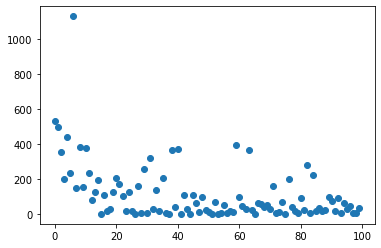

In [12]:
import matplotlib.pyplot as plt

plt.scatter(epochs, losses)